# **Otimização**
## **Lista de Exercícios 01-A | Questão 2**
**Aluno:** André Paiva Conrado Rodrigues

In [39]:
# Importação de dependências
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### **Problema de Otimização:**

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(\boldsymbol{x}) = x_{1}^{2} - 4x_{1} + x_{2} + 4 \\
\text{Sujeito a} \\
c_{1}: && -2x_{1} - 3x_{2} + 12 \geq 0 \\
c_{2}: && 1 - \frac{(x_{1} - 6)^{2}}{4} - \frac{x_{2}^{2}}{9} \geq 0 \\
\end{aligned}
\end{equation*}

**Trabalhando na primeira restrição:**
\begin{equation*}
\begin{aligned}
-2x_{1} - 3x_{2} + 12 \geq 0 \\
2x_{1} \leq 12 - 3x_{2} \\
x_{1} \leq 6 - \frac{3x_{2}}{2} \\
\text{Limite abaixo de uma reta}
\end{aligned}
\end{equation*}

In [40]:
# Restrição C1
c1_x2 = np.linspace(-5, 5, 2)
c1_x1 = 6 - (3.0*c1_x2/2.0)

**Trabalhando na segunda restrição:**
\begin{equation*}
\begin{aligned}
1 - \frac{(x_{1} - 6)^{2}}{4} - \frac{x_{2}^{2}}{9} \geq 0 \\
\frac{(x_{1} - 6)^{2}}{4} + \frac{x_{2}^{2}}{9} \leq 1 \\
\text{Elipse com centro em } (6, 0)
\end{aligned}
\end{equation*}

In [41]:
# Restrição C2
c2_x1 = (2*np.sin(np.linspace(0, 2*np.pi, 180))) + 6
c2_x2 = (3*np.cos(np.linspace(0, 2*np.pi, 180)))

**Visualizando a região de restrição graficamente:**

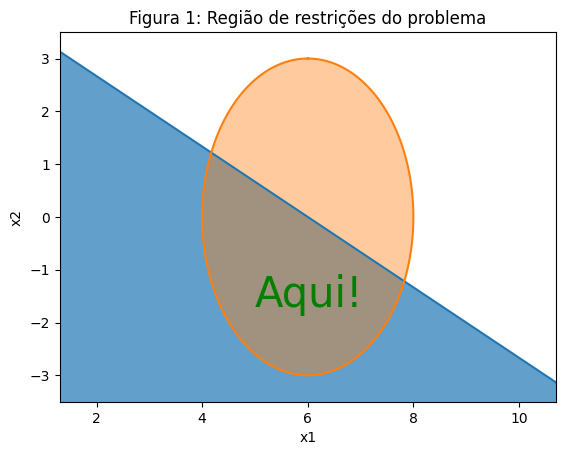

In [42]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.text(5, -1.7, "Aqui!", fontsize=30, color='green')
plt.fill_between(c1_x1, c1_x2, -4, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([3.5, 8.5])
plt.ylim([-3.5, 3.5])
plt.title("Figura 1: Região de restrições do problema")
plt.show()

**Plotando a função objetivo:**

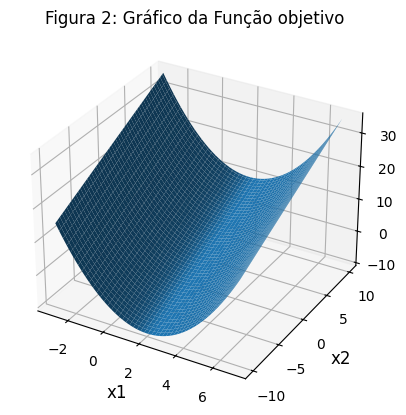

In [43]:
x1 = np.array([np.linspace(-3, 7, 100) for _ in range(100)])
x2 = np.array([np.linspace(-10, 10, 100) for _ in range(100)]).T
z = (x1**2) - (4*x1) + x2 + 4

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z)
ax.set_title("Figura 2: Gráfico da Função objetivo")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
plt.show()

**Derivada parcial da função objetivo em relação a $x_{1}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\boldsymbol{x})}{\partial x_{1}} = 2x_{1} - 4 \\
2x_{1} - 4 = 0 \implies x_{1} = 2
\end{aligned}
\end{equation*}

**Derivada parcial da função objetivo em relação a $x_{2}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\boldsymbol{x})}{\partial x_{2}} = 1 \neq 0
\end{aligned}
\end{equation*}

**Conclusões em relação ao ponto ótimo:**

Em relação a $x_{1}$, a função chega a seu mínimo quando $x_{1} = 2$.

Em relação a $x_{2}$, desconsiderando restrições, não há um ponto de mínimo: o que se vê é a contribuição de $x_{2}$ para o valor de $f(\boldsymbol{x})$ em um comportamento análogo a uma reta crescente, que vai desde $-\inf$ até $+\inf$; isto é, caso seja escolhido um valor constante para $x_{1}$, ao excursionar o valor de $x_{2}$, o comportamento de $f(\boldsymbol{x})$ será uma reta crescente.

Por conta da condição de $x_{2}$, a conclusão é de que não há ponto ótimo global.

**Restrições e limitações**

Como $x_{2}$ contribui para o valor de $f(\boldsymbol{x})$ com um comportamento análogo a uma reta crescente, para minimizar o valor de $f(\boldsymbol{x})$ dentro das restrições, devemos escolher o menor valor possível de $x_{2}$.

$x_{1}$ não pode ser igual a $2$, pois o plano $(2, x_{2}, f(\boldsymbol{x}))$ não se encontra na região de restrição, como visto na figura abaixo.

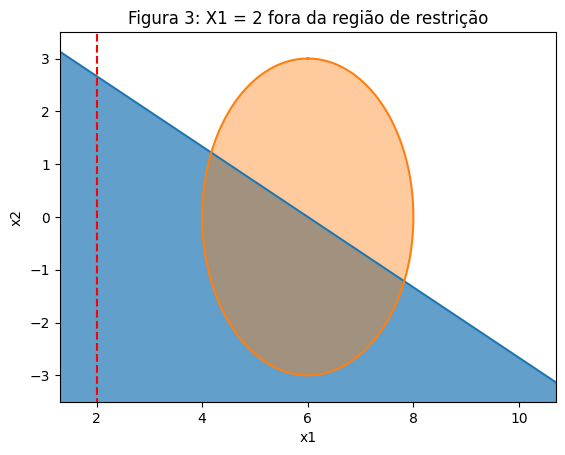

In [44]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.fill_between(c1_x1, c1_x2, -4, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([3.5, 8.5])
plt.ylim([-3.5, 3.5])
plt.plot([2, 2], [-4, 4], color='red', linestyle='dashed')
plt.title("Figura 3: X1 = 2 fora da região de restrição")
plt.show()

In [96]:
x1 = np.array([np.linspace(3, 9, 100) for _ in range(100)])
x2 = np.array([np.linspace(-4, 4, 100) for _ in range(100)]).T
z = (x1**2) - (4*x1) + x2 + 4

c1_x1_sur = np.array([np.linspace(c1_x1[0], c1_x1[1], 100) for _ in range(100)])
c1_x2_sur = np.array([np.linspace(c1_x2[0], c1_x2[1], 100) for _ in range(100)])
c1_z = np.array([np.linspace(0, 40, 100) for _ in range (100)]).T

cyl_theta = np.linspace(0, 2*np.pi, 100)
cyl_z = np.linspace(0, 40, 100)
cyl_theta, cyl_z = np.meshgrid(cyl_theta, cyl_z)
cyl_x1 = 2 * np.cos(cyl_theta) + 6
cyl_x2 = 3 * np.sin(cyl_theta)

fig = go.Figure(data=[go.Surface(x=x1, y=x2, z=z, opacity=0.7, showscale=False, colorscale="Viridis"),
                      go.Surface(x=cyl_x1, y=cyl_x2, z=cyl_z, opacity=0.7, showscale=False, colorscale="gray"),
                      go.Surface(x=c1_x1_sur, y=c1_x2_sur, z=c1_z, showscale=False, colorscale="gray")])
                
fig.update_layout(title='Figura 4: Função objetivo e regiões de restrição',
                  margin=dict(l=25, r=20, b=25, t=60),
                  scene = dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='f(x)'))
fig.show()